# Covariance matrix

This part of the nb computes the correlation and covariance of a data set o N files

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Importing txt files of points ### Means of data ###
# We take now 10 files from the outputted xis, from xi_pm_1 to 10)


xi_p = np.zeros((0,20))
xi_m = np.zeros((0,20))

# uploading all datafiles with the name of the form 'xi_pm_n.txt'
for i in range(15):
    datafile = 'xi_pm_'+ str(i+1) + '.txt'
    data_arr = np.loadtxt(datafile, skiprows=1, dtype=float)
    
    th_arr = data_arr[:,0] # first col in .txt
    xi_pData = data_arr[:,1] # takes the 2nd col. information (+)
    xi_mData = data_arr[:,2] # takes the 3nd col. information (-)
    
    xi_p = np.append(xi_p, [xi_pData], axis=0)
    xi_m = np.append(xi_m, [xi_mData], axis=0)

print(xi_p.shape, ' \n', xi_m.shape)

(15, 20)  
 (15, 20)


In [2]:
# for example, the last file xi_p_10 is:
xi_pData

array([2.96414638e-08, 2.64000004e-08, 2.38631658e-08, 2.17953191e-08,
       1.93460743e-08, 1.67990137e-08, 1.45715069e-08, 1.24346833e-08,
       1.04636503e-08, 8.81577507e-09, 7.52710201e-09, 6.36556853e-09,
       5.31894299e-09, 4.59819760e-09, 4.01047679e-09, 3.34345781e-09,
       2.91375830e-09, 2.46739833e-09, 2.14634174e-09, 1.72677162e-09])

In [3]:
# Now we need to transpose this matrix, so we make

xi_pT = np.transpose(xi_p)
xi_mT = np.transpose(xi_m)

In [4]:
Means_xip = []
Means_xim = []

size_th = len(th_arr)

for j in range(size_th):
    Means_xip = np.append(Means_xip, np.mean(xi_pT[j]))
    Means_xim = np.append(Means_xim, np.mean(xi_mT[j]))

print(Means_xip, ' \n', Means_xim)

[2.12736463e-08 1.90413304e-08 1.73724305e-08 1.59173877e-08
 1.42762870e-08 1.24601677e-08 1.08090732e-08 9.30394178e-09
 7.95048608e-09 6.75202417e-09 5.73298072e-09 4.89950820e-09
 4.17787960e-09 3.54191127e-09 3.00680737e-09 2.56742482e-09
 2.15005442e-09 1.80898949e-09 1.51905879e-09 1.25159639e-09]  
 [7.72456930e-10 6.55079803e-10 6.52345889e-10 5.96310987e-10
 5.70537003e-10 5.25566477e-10 4.83764612e-10 4.37084313e-10
 4.03525234e-10 3.74930122e-10 3.37310063e-10 3.04784547e-10
 2.47296267e-10 2.27088141e-10 1.97063066e-10 2.03480145e-10
 1.65548355e-10 1.29908115e-10 1.00513662e-10 5.18029355e-11]


In [5]:
xip_mean = np.transpose([th_arr[:], Means_xip[:]])
xim_mean = np.transpose([th_arr[:], Means_xim[:]])

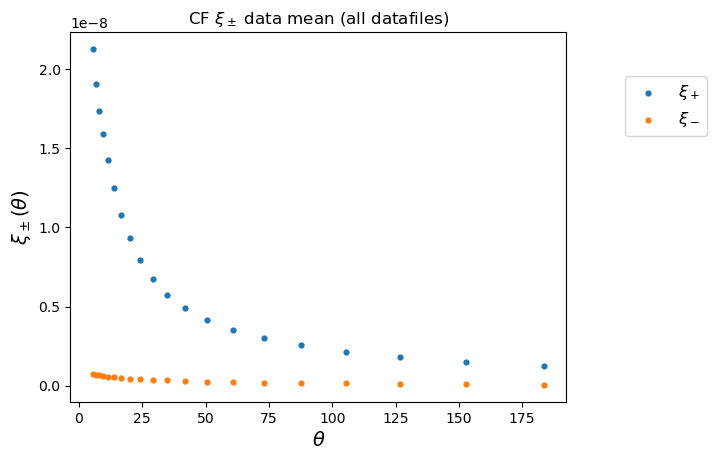

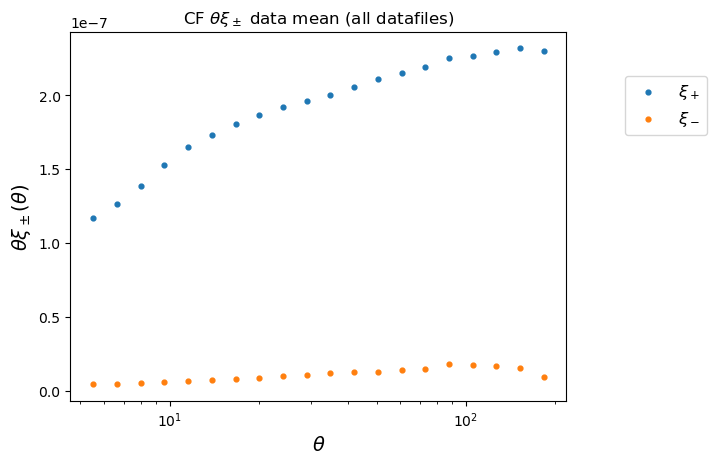

In [6]:
plt.scatter(xip_mean[:,0], xip_mean[:,1], s=12, label = r'$\xi_+$')
plt.scatter(xim_mean[:,0], xim_mean[:,1], s=12, label = r'$\xi_-$')
plt.title(r'CF $\xi_\pm$ data mean (all datafiles)')
plt.xlabel(r'$\theta$', fontsize = 14)
plt.ylabel(r'$\xi_\pm(\theta)$', fontsize = 14)
plt.legend(loc='right',bbox_to_anchor=(1.3, 0.8), fontsize=12)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

plt.scatter(xip_mean[:,0], (xip_mean[:,0])*(xip_mean[:,1]), s=12, label = r'$\xi_+$')
plt.scatter(xim_mean[:,0], (xim_mean[:,0])*(xim_mean[:,1]), s=12, label = r'$\xi_-$')
plt.title(r'CF $\theta \xi_\pm$ data mean (all datafiles)')
plt.xlabel(r'$\theta$', fontsize = 14)
plt.ylabel(r'$\theta \xi_\pm(\theta)$', fontsize = 14)
plt.legend(loc='right',bbox_to_anchor=(1.3, 0.8), fontsize=12)
plt.xscale('log')
# plt.yscale('log')
plt.show()

# Covariance and correlation matrices

We know the covariance matrix is the generalization of the covariance in n dimensions, so it's a nxn squared matrix with n data.
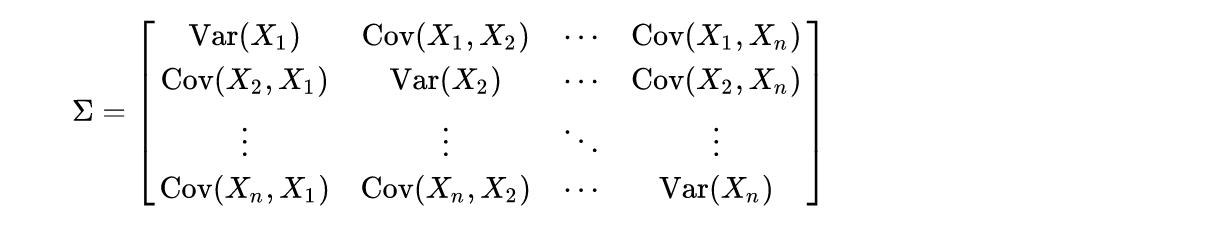

Computing the covariance as

$$
    Cov_{i,j} = Cov(x_i, x_j) = \frac{1}{N} \sum_{k=1}^n \left( x_k - \bar{x}_{i(k)} \right) \left( x_k - \bar{x}_{j(k)} \right)
$$

(where evidently, $Cov_{i,i} = Cov(x_i,x_i) = Var(x_i) \equiv \sigma^2_{x_i}$) and, analogously (just different for the terms in the denominator), the correlation as the matrix which elements are of the form

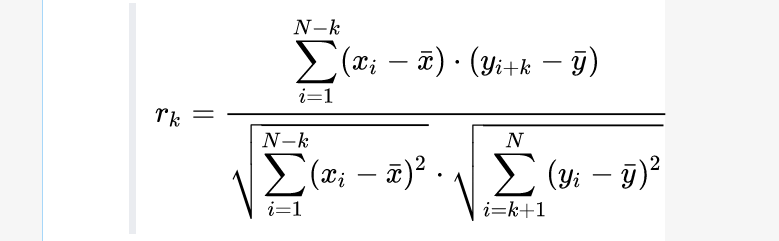

we get the following

In [7]:
CovM_p = np.zeros((0,size_th)); CovM_m = np.zeros((0,size_th)); CorrM_p = np.zeros((0,size_th)); CorrM_m = np.zeros((0,size_th))
num_points = 10

for k1 in range(size_th):
    CovM_row_p = []
    CovM_row_m = []
    CorrM_row_p = []
    CorrM_row_m = []
    for k2 in range(size_th):
        covm_v_p = np.sum( (Means_xip[k1] - xi_pT[k1,:])*(Means_xip[k2] - xi_pT[k2,:]) )/num_points
        covm_v_m = np.sum( (Means_xim[k1] - xi_mT[k1,:])*(Means_xim[k2] - xi_mT[k2,:]) )/num_points
        
        CovM_row_p = np.append(CovM_row_p, covm_v_p)
        CovM_row_m = np.append(CovM_row_m, covm_v_m)
        
        sk1_p = np.sqrt(np.sum( (Means_xip[k1] - xi_pT[k1,:])**2 )/num_points)
        sk1_m = np.sqrt(np.sum( (Means_xim[k1] - xi_mT[k1,:])**2 )/num_points)
        sk2_p = np.sqrt(np.sum( (Means_xip[k2] - xi_pT[k2,:])**2 )/num_points)
        sk2_m = np.sqrt(np.sum( (Means_xim[k2] - xi_mT[k2,:])**2 )/num_points)
        
        CorrM_row_p = np.append(CorrM_row_p, covm_v_p/(sk1_p*sk2_p))
        CorrM_row_m = np.append(CorrM_row_m, covm_v_m/(sk1_m*sk2_m))
    CovM_p = np.append(CovM_p, [CovM_row_p], axis=0)
    CorrM_p = np.append(CorrM_p, [CorrM_row_p], axis=0)
    CovM_m = np.append(CovM_m, [CovM_row_m], axis=0)
    CorrM_m = np.append(CorrM_m, [CorrM_row_m], axis=0)

### Exporting data (as .dat files)

In [8]:
# import pandas as pd 

# output_df = pd.DataFrame({'name': file})  
# output_df.to_csv('output_file_name.dat')

In [9]:
np.savetxt('Covariance_xip.dat', CovM_p)
np.savetxt('Covariance_xim.dat', CovM_m)
np.savetxt('Correlation_xip.dat', CorrM_p)
np.savetxt('Correlation_xim.dat', CorrM_m)

## Plotting covariance matrix

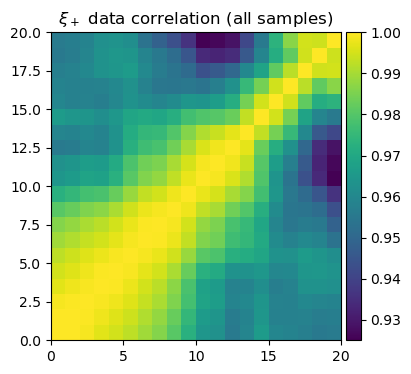

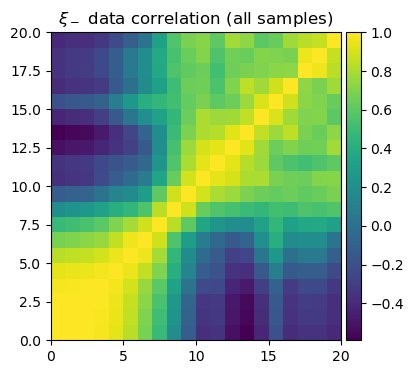

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.subplot()
im = ax.pcolormesh(CorrM_p)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax.set_title(r'$\xi_+$ data correlation (all samples)', fontsize=12)
plt.xlabel(r'$xi_+(\theta)$', fontsize = 14)
plt.ylabel(r'$xi_+(\theta)$', fontsize = 14)
plt.rcParams["figure.figsize"] = (4,4)
plt.colorbar(im, cax=cax)
plt.show()

ax2 = plt.subplot()
im2 = ax2.pcolormesh(CorrM_m)

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax2.set_title(r'$\xi_-$ data correlation (all samples)', fontsize=12)
plt.xlabel(r'$xi_-(\theta)$', fontsize = 14)
plt.ylabel(r'$xi_-(\theta)$', fontsize = 14)
plt.rcParams["figure.figsize"] = (4,4)
plt.colorbar(im2, cax=cax)
plt.show()

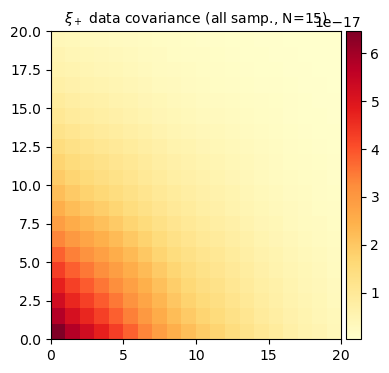

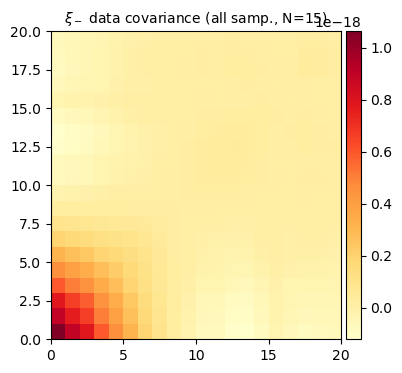

In [27]:
cmap = plt.colormaps['YlOrRd']


ax3 = plt.subplot()
im3 = ax3.pcolormesh(CovM_p, norm=None, cmap=cmap)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
ax3.set_title(r'$\xi_+$ data covariance (all samp., N=15)', fontsize=10)
plt.xlabel(r'$xi_-(\theta)$', fontsize = 14)
plt.ylabel(r'$xi_-(\theta)$', fontsize = 14)
plt.rcParams["figure.figsize"] = (4,4)
plt.colorbar(im3, cax=cax3)
plt.show()

ax4 = plt.subplot()
im4 = ax4.pcolormesh(CovM_m, norm=None, cmap=cmap)

divider4 = make_axes_locatable(ax4)
cax4 = divider4.append_axes("right", size="5%", pad=0.05)
ax4.set_title(r'$\xi_-$ data covariance (all samp., N=15)', fontsize=10)
plt.xlabel(r'$xi_-(\theta)$', fontsize = 14)
plt.ylabel(r'$xi_-(\theta)$', fontsize = 14)
plt.rcParams["figure.figsize"] = (4,4)
plt.colorbar(im4, cax=cax4)
plt.show()